In [1]:
# Creates a simple random forest benchmark

import numpy as np
import pandas as pd

import cv2
import itertools
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import log_loss, precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from IPython.display import display

from datetime import datetime

import matplotlib.cm as cm  
%matplotlib inline

In [2]:
#train = pandas.read_csv("../input/train.csv")
train = pd.read_csv("E:/MNIST/digits/train.csv")
# display(train.head(n=3))

#test = pandas.read_csv("../input/test.csv")
test = pd.read_csv("E:/MNIST/digits/test.csv")
# display(test.head(n=3))

In [3]:
# Set the random seed
random_seed = 7

# Set percentage of test set
test_size = 0.2

In [4]:
ex_row = train.iloc[[10]].values.ravel()
ex_img = np.array(ex_row[1:].reshape(28, 28), dtype="float32")

train_matrix = train.as_matrix()
X = train_matrix[:, 1:]
y = train_matrix[:, 0]

# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=random_seed)

In [5]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('image_size = ', X.shape[1])
print('image_width = ', ex_img.shape[0])
print('image_height = ', ex_img.shape[1])
print('labels_count = ', len(np.unique(y_train)))
print('=' * 50)
print('X_val.shape = ', X_val.shape)
print('Y_val.shape = ', y_val.shape)

X_train.shape =  (33600, 784)
y_train.shape =  (33600,)
image_size =  784
image_width =  28
image_height =  28
labels_count =  10
X_val.shape =  (8400, 784)
Y_val.shape =  (8400,)


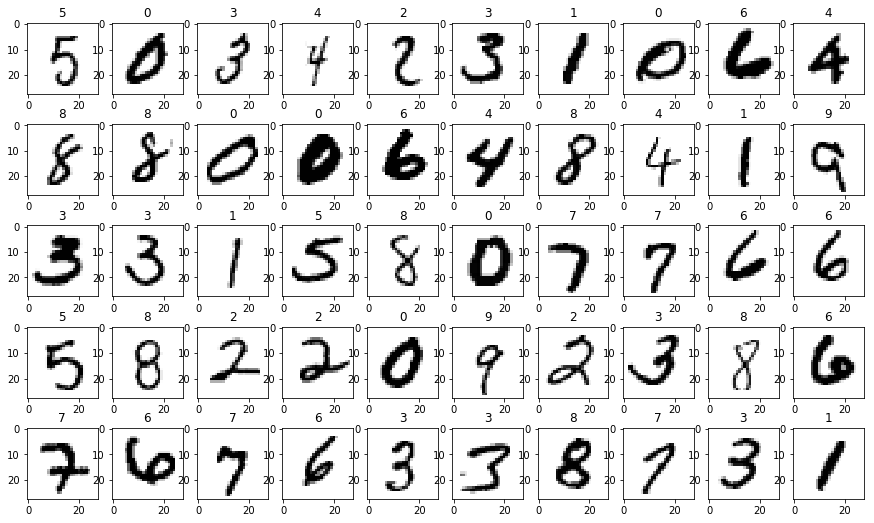

In [6]:
X_train_ed = X_train.reshape(-1,28,28,1)

#plot some images and labels
plt.figure(figsize=(15,9))
for i in range(50):
    plt.subplot(5,10,1+i)
    plt.title(y_train[i])
    plt.imshow(X_train_ed[i].reshape(28,28), cmap=cm.binary)

In [7]:
n_estimators = 50

for i in range(1, n_estimators + 1):
    alg = RandomForestClassifier(random_state=1, n_estimators=i, min_samples_split=2, min_samples_leaf=1, n_jobs=-1)
    
    start = datetime.now()
    alg.fit(X_train, y_train)
    end = datetime.now() - start
    train_runtime = end.total_seconds()

    predictions = alg.predict(X_val)
    proba_predictions = alg.predict_proba(X_val)
    
    score = {
        'accuracy' : accuracy_score(y_val, predictions),
        'loss' : log_loss(y_val, proba_predictions),
        'train_runtime' : train_runtime,
    }
    
    print("Build tree " + str(i) + ", Loss=" + "{:.4f}".format(score['loss']) 
        + ", Accuracy=" + "{:.4f}".format(score['accuracy']) + ", Train Runtime=" + 
          "{:.4f}".format(score['train_runtime']) + "s")

Build tree 1, Loss=6.5583, Accuracy=0.8101, Train Runtime=10.8226s
Build tree 2, Loss=2.8608, Accuracy=0.8052, Train Runtime=11.4537s
Build tree 3, Loss=1.6950, Accuracy=0.8756, Train Runtime=18.3110s
Build tree 4, Loss=1.2147, Accuracy=0.8992, Train Runtime=19.2361s
Build tree 5, Loss=0.9532, Accuracy=0.9139, Train Runtime=24.4354s
Build tree 6, Loss=0.7702, Accuracy=0.9258, Train Runtime=28.2946s
Build tree 7, Loss=0.6691, Accuracy=0.9313, Train Runtime=28.8086s
Build tree 8, Loss=0.5849, Accuracy=0.9344, Train Runtime=33.5129s
Build tree 9, Loss=0.5625, Accuracy=0.9371, Train Runtime=36.1311s
Build tree 10, Loss=0.5279, Accuracy=0.9385, Train Runtime=43.7305s
Build tree 11, Loss=0.4845, Accuracy=0.9419, Train Runtime=44.6696s
Build tree 12, Loss=0.4382, Accuracy=0.9444, Train Runtime=39.5873s
Build tree 13, Loss=0.4157, Accuracy=0.9448, Train Runtime=38.8392s
Build tree 14, Loss=0.4072, Accuracy=0.9460, Train Runtime=41.4104s
Build tree 15, Loss=0.4033, Accuracy=0.9463, Train Runtim

<h1>Mengeluarkan akurasi, precision, dan recall hasil cross validation</h1>

In [8]:
start = datetime.now()
predictions = alg.predict(X_val)
end = datetime.now() - start
score['test_runtime'] = end.total_seconds()

proba_predictions = alg.predict_proba(X_val)

score['precision'] = precision_score(y_val, predictions, average='macro')
score['recall'] = recall_score(y_val, predictions, average='macro')
score['f_score'] = f1_score(y_val, predictions, average='macro')
score['confusion_matrix'] = confusion_matrix(y_val, predictions)

df_eval = pd.Series(score, index=['accuracy','precision','recall','f_score', 'loss', 'train_runtime', 'test_runtime'])
print(df_eval)

accuracy           0.961905
precision          0.961655
recall             0.961487
f_score            0.961552
loss               0.304123
train_runtime    137.320855
test_runtime       1.799103
dtype: float64


In [9]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

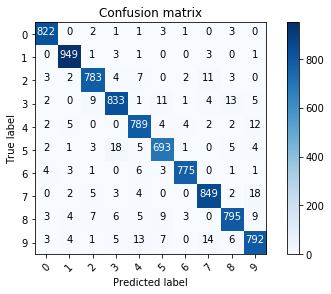

In [10]:
# plot the confusion matrix
plot_confusion_matrix(score['confusion_matrix'], classes = range(10)) 

In [11]:
clf_rep = precision_recall_fscore_support(y_val, predictions)
out_dict = {
            "misclassification" : score['confusion_matrix'].sum(axis=1)-score['confusion_matrix'].diagonal()
            ,"accuracy" : (score['confusion_matrix'].diagonal()/score['confusion_matrix'].sum(axis=1)).round(2)
            ,"precision" : clf_rep[0].round(2)
            ,"recall" : clf_rep[1].round(2)
            ,"f1-score" : clf_rep[2].round(2)
            ,"support" : clf_rep[3]
            }
out_df = pd.DataFrame(out_dict)
avg_tot = (out_df.apply(lambda x: round(x.mean(), 2) if x.name!="misclassification" and x.name!="support" else  round(x.sum(), 2)).to_frame().T)
avg_tot.index = ["avg/total"]
out_df = out_df.append(avg_tot)
out_df = out_df.reindex(['misclassification', 'accuracy', 'precision', 'recall', 'f1-score', 'support'], axis=1)
out_df['misclassification'] = out_df['misclassification'].astype('int')
out_df['support'] = out_df['support'].astype('int')

out_df

,misclassification,accuracy,precision,recall,f1-score,support
0,11,0.99,0.98,0.99,0.98,833
1,9,0.99,0.98,0.99,0.98,958
2,32,0.96,0.96,0.96,0.96,815
3,46,0.95,0.95,0.95,0.95,879
4,31,0.96,0.95,0.96,0.96,820
5,39,0.95,0.95,0.95,0.95,732
6,19,0.98,0.98,0.98,0.98,794
7,34,0.96,0.96,0.96,0.96,883
8,46,0.95,0.96,0.95,0.95,841
9,53,0.94,0.94,0.94,0.94,845


<h3>Prediksi validation set dengan RF</h3>

In [12]:
df_feature = pd.DataFrame(X_val, columns=[["pixel"+str(i) for i in list(range(784))]])

df_rf_pred = pd.DataFrame(np.column_stack([y_val, predictions]), columns=['label', 'prediction'])

df_rf_pred = df_rf_pred.join(df_feature)

display(df_rf_pred.head(10))

,label,prediction,"(pixel0,)","(pixel1,)","(pixel2,)","(pixel3,)","(pixel4,)","(pixel5,)","(pixel6,)","(pixel7,)",...,"(pixel774,)","(pixel775,)","(pixel776,)","(pixel777,)","(pixel778,)","(pixel779,)","(pixel780,)","(pixel781,)","(pixel782,)","(pixel783,)"
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Menyimpan hasil prediksi kedalam csv</h3>

In [13]:
df_rf_pred.to_csv("rf_mnist_prediction.csv",index=False)

# false predictions:  320 out of 8400


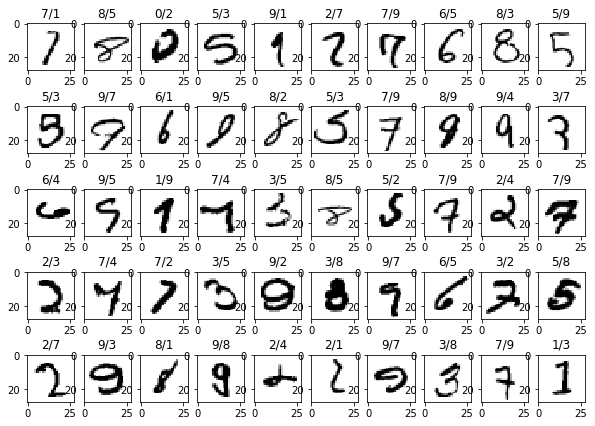

In [14]:
y_val_false_index = []

for i in range(y_val.shape[0]):
    if predictions[i] != y_val[i]:
        y_val_false_index.append(i)

print('# false predictions: ', len(y_val_false_index),'out of', len(y_val))

plt.figure(figsize=(10,15))
for j in range(0,5):
    for i in range(0,10):
        if j*10+i<len(y_val_false_index):
            plt.subplot(10,10,j*10+i+1)
            
            # (nilai ground truth) / (nilai prediksi)
            plt.title('%d/%d'%(y_val[y_val_false_index[j*10+i]],
                               predictions[y_val_false_index[j*10+i]]))
            plt.imshow(X_val[y_val_false_index[j*10+i]].reshape(28,28),cmap=cm.binary) 

<h3>Menampilkan learning curve</h3>

In [15]:
def plot_learning_curve(estimator, title, X, y, scoring, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = abs(np.mean(train_scores, axis=1))
    train_scores_std = abs(np.std(train_scores, axis=1))
    test_scores_mean = abs(np.mean(test_scores, axis=1))
    test_scores_std = abs(np.std(test_scores, axis=1))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

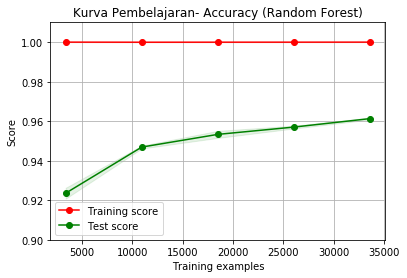

In [16]:
title = "Kurva Pembelajaran- Accuracy (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=2, test_size=test_size, random_state=0)

plot_learning_curve(alg, title, X, y, scoring='accuracy', ylim=(0.9, 1.01), cv=cv, n_jobs=4)

plt.show()

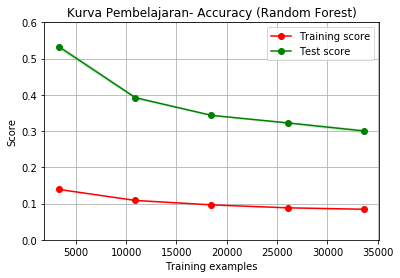

In [17]:
title = "Kurva Pembelajaran- Accuracy (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=2, test_size=test_size, random_state=0)

plot_learning_curve(alg, title, X, y, scoring='neg_log_loss', ylim=(0.0, 0.6), cv=cv, n_jobs=4)

plt.show()